# Introduction to DEA Land Cover <img align="right" src="../Supplementary_data/dea_logo.jpg">

* [**Sign up to the DEA Sandbox**](https://docs.dea.ga.gov.au/setup/sandbox.html) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments
* **Products used:** 
[ga_ls_landcover_class_cyear_2](https://explorer.sandbox.dea.ga.gov.au/ga_ls_landcover_class_cyear_2)


## Background

Land cover is the observed physical cover on the Earth's surface, including trees, shrubs, grasses, soils, exposed rocks, water bodies, plantations, crops and built structures.
Australia's land cover is constantly changing in response to natural phenomena and human development.
Understanding how land cover responds to these pressures is crucial for monitoring and managing our environment. 


### What this product offers

[Digital Earth Australia Land Cover (DEA Land Cover)](https://cmi.ga.gov.au/data-products/dea/607/dea-land-cover-landsat) is a continental dataset that maps  annual land cover classifications for Australia from 1988 to the present. The product combines Landsat satellite data and related data products from Geoscience Australia's [Digital Earth Australia](https://www.dea.ga.gov.au/) program.

DEA Land Cover allows users to measure land cover trends over a range of spatial, temporal and thematic scales. 
The product can also be used to identify how different parts of the environment interrelate and respond to change. 
Scientists, resource managers and policymakers can use these findings to support environmental management and development programs that benefit society, the environment and the economy.

The classification system used in DEA Land Cover follows the Food and Agriculture Organization of the United Nations [land cover classification taxonomy](https://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1036361/), allowing for comparison and integration with other national and international datasets. 
The product defines 6 base land cover classes (`level3`), 7 land cover class descriptors, and a final land cover classification (`level4`) that combines both base classes and class descriptors.
In-depth information about each class can be found on the [DEA Land Cover product details](https://cmi.ga.gov.au/data-products/dea/607/dea-land-cover-landsat#details) page.

### Applications

Annual land cover information can be used to monitor and manage Australia's environments. These include but are not limited to the following areas in environmental monitoring, the primary industries, and the interests and safety of the Australian community: 

* **Environmental monitoring:** ecosystem mapping, understanding surface water dynamics, erosion management 

* **Primary industries:** understanding crop responses to water availability, understanding and mitigating impact of drought, monitoring vegetation change

* **Community interests:** mapping urban expansion, mapping impacts of natural disasters, bushfire recovery.


### Publications
* Lucas R, Mueller N, Siggins A, Owers C, Clewley D, Bunting P, Kooymans C, Tissott B, Lewis B, Lymburner L, Metternicht G (2019) 'Land Cover Mapping using Digital Earth Australia', <em>Data</em>, 4(4):143, doi: [10.3390/data4040143](https://www.mdpi.com/2306-5729/4/4/143/htm).


* Owers C, Lucas R, Clewley D, Planque C, Punalekar S, Tissott B, Chua S, Bunting P, Mueller N, Metternicht G (2021) 'Living Earth: Implementing national standardised land cover classification systems for Earth Observation in support of sustainable development', <em>Big Earth Data</em>, 5(3):368-390, doi:[10.1080/20964471.2021.1948179](https://www.tandfonline.com/doi/full/10.1080/20964471.2021.1948179?scroll=top&needAccess=true).

> **Note:** For more technical information about DEA Land Cover, visit the official Geoscience Australia [DEA Land Cover product description](https://cmi.ga.gov.au/data-products/dea/607/dea-land-cover-landsat) page.


## Description
This notebook will demonstrate how to load and visualise [DEA Land Cover](https://cmi.ga.gov.au/data-products/dea/607/dea-land-cover-landsat) data using Digital Earth Australia. Topics covered include:

1. Inspecting available measurements in DEA Land Cover.
2. Choosing and loading DEA Land Cover data for an area of interest.
3. Plotting DEA Land Cover data for an area of interest.

## Getting started

To run this analysis, run all the cells in the notebook, starting with the 'Load packages' cell. 

### Load packages
Load key Python packages and supporting functions for the analysis.


In [1]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import numpy as np

import sys

sys.path.insert(1, "../Tools/")
from dea_tools.plotting import rgb, display_map
from dea_tools.land_cover import plot_land_cover
from matplotlib import colors as mcolours

### Connect to the datacube

Connect the datacube database, which provides functionality for loading and displaying stored Earth observation data.

In [2]:
dc = datacube.Datacube(app='DEA_Land_Cover')

### View list measurements
We can inspect the contents of DEA Land Cover using the `dc.list_measurements()` function.

The table generated in the following cell lists each of the measurements available in DEA Land Cover. 
There are 2 levels of land cover classification, `level3` (basic) and `level4` (detailed), and the 7 land cover class descriptors:

* `lifeform_veg_cat_l4a`: describes the predominant vegetation type in vegetated areas: woody or herbaceous.
* `canopyco_veg_cat_l4d`: describes the percentage of cover in vegetated areas.
* `watersea_veg_cat_l4a_au`: describes length of time an aquatic vegetated area was measured as being inundated.
* `waterstt_wat_cat_l4a`: describes whether the detected water is snow, ice or liquid water.
* `inttidal_wat_cat_l4a`: delineates the intertidal zone.
* `waterper_wat_cat_l4d_au`: describes the number of months a water body contains water.
* `baregrad_phy_cat_l4d_au`: describes the percentage of bare cover in naturally bare areas.

The table also provides information about the measurement data types, nodata values, and aliases available for each measurement contained in the product. 
Aliases (e.g. lifeform) can be used instead of the official measurement name (e.g. lifeform_veg_cat_l4a) when loading data (see <strong>Load and view DEA Land Cover data</strong>).


In [3]:
product = "ga_ls_landcover_class_cyear_2"

measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition,spectral_definition
measurement,,,,,,,
level3,level3,uint8,1,0,NaN,NaN,NaN
lifeform_veg_cat_l4a,lifeform_veg_cat_l4a,int8,1,0,[lifeform],NaN,NaN
canopyco_veg_cat_l4d,canopyco_veg_cat_l4d,int8,1,0,[vegetation_cover],NaN,NaN
watersea_veg_cat_l4a_au,watersea_veg_cat_l4a_au,int8,1,0,[water_seasonality],NaN,NaN
waterstt_wat_cat_l4a,waterstt_wat_cat_l4a,int8,1,0,[water_state],NaN,NaN
inttidal_wat_cat_l4a,inttidal_wat_cat_l4a,int8,1,0,[intertidal],NaN,NaN
waterper_wat_cat_l4d_au,waterper_wat_cat_l4d_au,int8,1,0,[water_persistence],NaN,NaN
baregrad_phy_cat_l4d_au,baregrad_phy_cat_l4d_au,int8,1,0,[bare_gradation],NaN,NaN
level4,level4,int8,1,0,[full_classification],NaN,NaN


## Select and view your study area

**If running the notebook for the first time,** keep the default settings below.
This will demonstrate how the analysis works and provide meaningful results.
The following example loads land cover data for Broome, Western Australia.

In [4]:
# Coordinates for Broome, Western Australia 
lat = -18.10
lon = 122.32
lat_buffer = 0.18
lon_buffer = 0.18

# Combine central coordinates with buffer values to create the latitude and longitude range for the analysis 
lat_range = (lat - lat_buffer, lat + lat_buffer)
lon_range = (lon - lon_buffer, lon + lon_buffer)

# Set the range of dates for the analysis
time_range = ('2017', '2020')

The following cell will display the selected area on an interactive map.
You can zoom in and out to better understand the area you'll be analysing. 
Clicking on any point on the map will reveal the latitude and longitude coordinates of that point.

In [5]:
display_map(x=lon_range, y=lat_range)

## Load and view DEA Land Cover data 
The following cell will load data for the `lat_range`, `lon_range` and `time_range` we defined above.
We can do this using the `dc.load()` function. 

> **Note:** The following cell loads all available measurements in DEA Land Cover, however, the query can be adapted to only load measurements of interest.

In [6]:
# Create the 'query' dictionary object, which contains the longitudes, latitudes and time defined above
query = {
    'y': lat_range,
    'x': lon_range,
    'time': time_range,
}

# Load DEA Land Cover data from the datacube
lc = dc.load(product='ga_ls_landcover_class_cyear_2',
             output_crs='EPSG:3577',
             measurements=['level3', 'lifeform', 'vegetation_cover', 'water_seasonality',
                           'water_state', 'intertidal', 'water_persistence', 
                           'bare_gradation', 'full_classification'],
             resolution=(25, -25),
             **query)

We can now view the data. 
The measurements listed under `Data variables` should match the measurements listed in the above query.

More information on interpreting `xarray.Dataset` results can be found in our [Beginner's guide](https://docs.dea.ga.gov.au/notebooks/Beginners_guide/04_Loading_data.html#Interpreting-the-resulting-xarray.Dataset).

In [7]:
lc

<xarray.Dataset>
Dimensions:              (time: 4, y: 1705, x: 1641)
Coordinates:
  * time                 (time) datetime64[ns] 2017-01-01 ... 2020-01-01
  * y                    (y) float64 -1.993e+06 -1.993e+06 ... -1.951e+06
  * x                    (x) float64 -1.003e+06 -1.003e+06 ... -1.044e+06
    spatial_ref          int32 3577
Data variables:
    level3               (time, y, x) uint8 112 112 112 112 ... 220 220 220 220
    lifeform             (time, y, x) int8 2 2 2 2 2 2 2 2 2 ... 0 0 0 0 0 0 0 0
    vegetation_cover     (time, y, x) int8 13 13 13 13 13 13 13 ... 0 0 0 0 0 0
    water_seasonality    (time, y, x) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    water_state          (time, y, x) int8 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1
    intertidal           (time, y, x) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    water_persistence    (time, y, x) int8 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1
    bare_gradation       (time, y, x) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    full_classification  (time, y, x) int8 34 34 34 34 34 ... 101 101 101 101
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

## Plotting data

Because DEA Land Cover contains categorical data, each classification is best visualised with custom colour schemes. 
The `plot_layer()` function defined in the next cell will create a colour map for a provided colour scheme dictionary, which is then used to visualise data. 

In [8]:
# Plot layer from colour map
def plot_layer(colours, data):
    colour_arr = []
    cblabels = []
    for key, value in colours.items():
        colour_arr.append(np.array(value[:-2])/255)
        cblabels.append(value[-1])

    cmap = mcolours.ListedColormap(colour_arr)
    bounds = list(colours)
    bounds.append(255)
    norm = mcolours.BoundaryNorm(np.array(bounds)-0.1, cmap.N)

    # Plot the provided layer
    im = data.plot(cmap=cmap, norm=norm, add_colorbar=True, col='time', col_wrap=4, size=8)

    cb = im.cbar
    ticks = cb.get_ticks()
    cb.set_ticks(ticks + np.diff(ticks, append=256)/2)
    cb.set_ticklabels(cblabels)    
    
    return im

### Level 3 visualisation (basic)

The Level 3 classification contains the 6 base classes: 
* 111: cultivated terrestrial vegetation
* 112: natural terrestrial vegetation
* 124: natural aquatic vegetation
* 215: artificial surface
* 216: natural bare surface
* 220: water. 

More information about these classes can be found on the official Geoscience Australia [DEA Land Cover product description](https://cmi.ga.gov.au/data-products/dea/607/dea-land-cover-landsat#details) page. 

The first step in plotting data is creating a colour scheme. 
The keys in the below dictionary are the classification values for `level3`, and the following values consists of colour specifications (red, green, blue, alpha) for each class and a description to be used in the legend.

In [9]:
# Define a colour scheme for the Level 3 layer
LEVEL3_COLOUR_SCHEME = { 0   : (255, 255, 255, 255, "No Data"),
                         111 : (172, 188, 45, 255, "Cultivated terrestrial vegetation"),
                         112 : (14, 121, 18, 255, "Natural terrestrial vegetation"),
                         124 : (30, 191, 121, 255, "Natural aquatic vegetation"),
                         215 : (218, 92, 105, 255, "Artificial surface"),
                         216 : (243, 171, 105, 255, "Natural bare surface"),
                         220 : (77, 159, 220, 255, "Water")}

The cell below plots the `level3` classification using the `plot_layer()` function and the above colour scheme. 

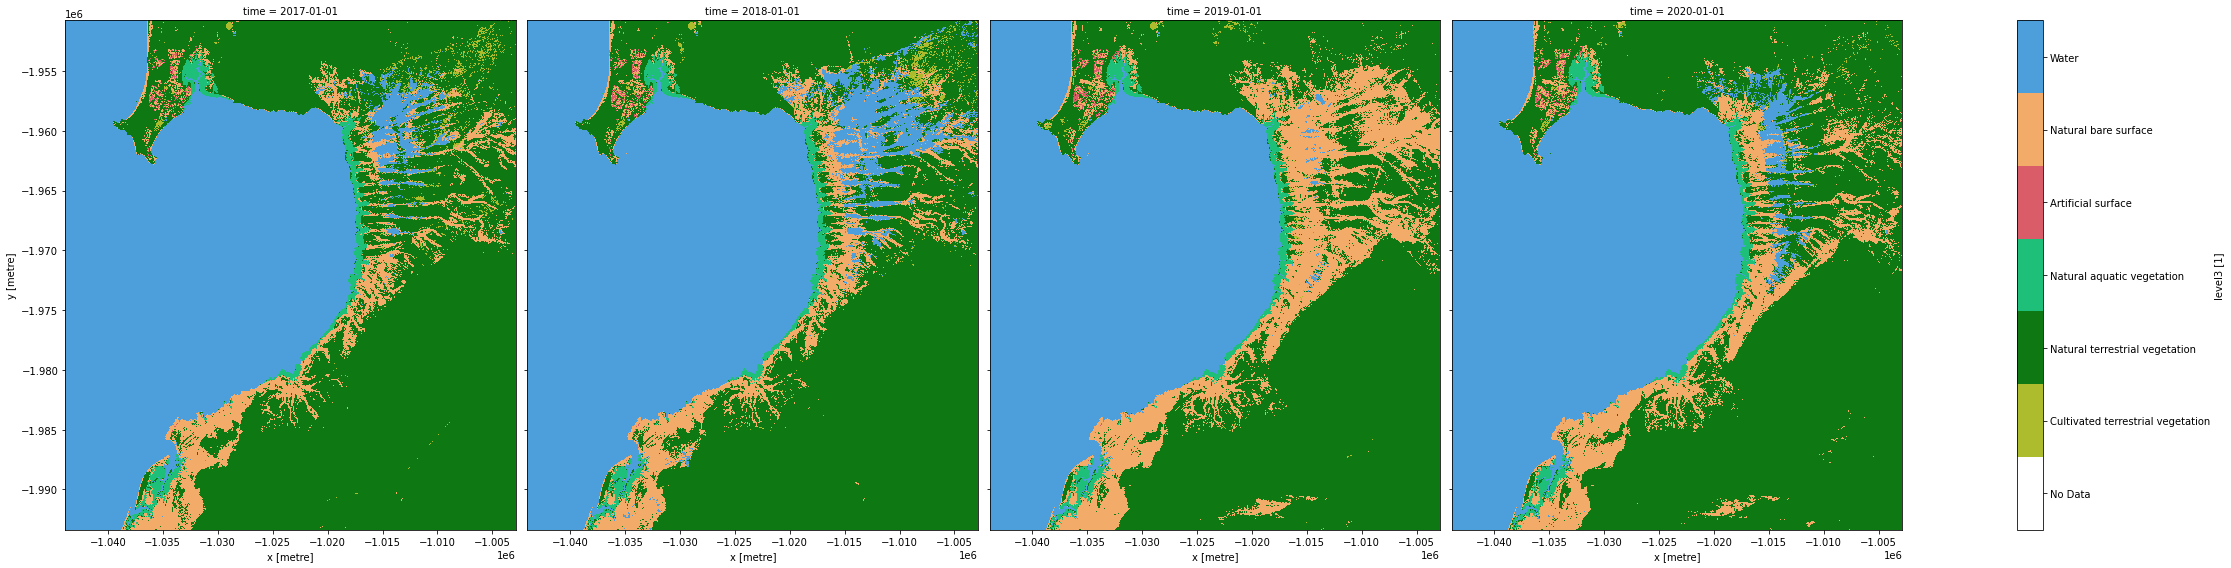

In [10]:
plot_layer(LEVEL3_COLOUR_SCHEME, lc.level3)

# plot_land_cover(lc.level3)

### Visualising class descriptors 

There are 7 class descriptors in DEA Land Cover: lifeform, vegetation cover, water seasonality, water state, intertidal area, water persistence, and bare gradation. 

The following section provides more detail about each class descriptor, then uses the `plot_land_cover()` function to visualise them. 

#### Lifeform

The lifeform class descriptor describes the predominant vegetation type in vegetated areas.
It is categorised as follows: 

* 0: No data or not vegetated 
* 1: Woody vegetation (trees, shrubs)
* 2: Herbaceous vegetation (grasses, forbs)

Lifeform provides detail to cultivated terrestrial vegetation (111), natural terrestrial vegetation (112), and natural aquatic vegetation (124).

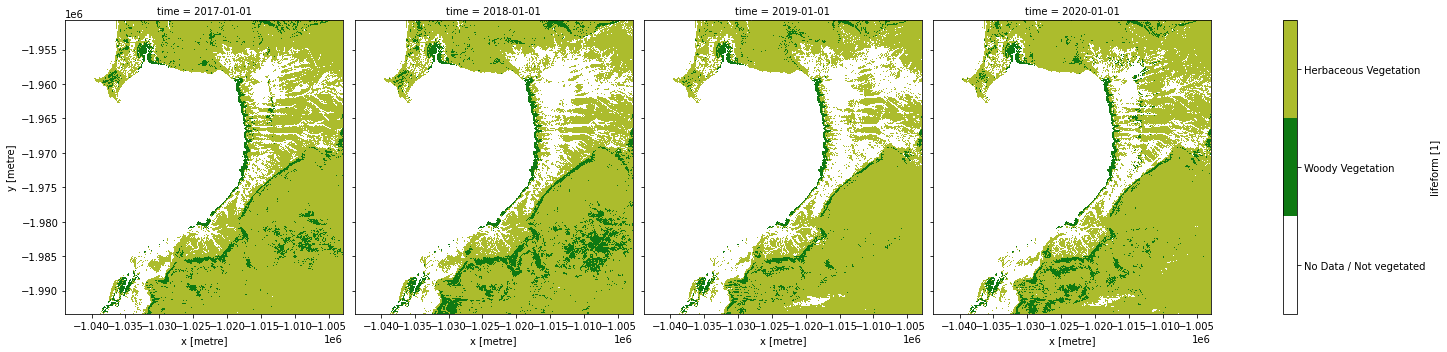

In [22]:
plot_land_cover(lc.lifeform)

#### Vegetation cover

The vegetation cover class descriptor describes the percentage of cover in vegetated areas. 
It is categorised as follows: 

* 0: Not applicable (such as in bare areas)
* 10: Closed (>65%)  
* 12: Open (40 to 65%)  
* 13: Open (15 to 40%)  
* 15: Sparse (4 to 15%)  
* 16: Scattered (1 to 4%)  

Vegetation cover provides detail to cultivated terrestrial vegetation (111), natural terrestrial vegetation (112), and natural aquatic vegetation (124). 

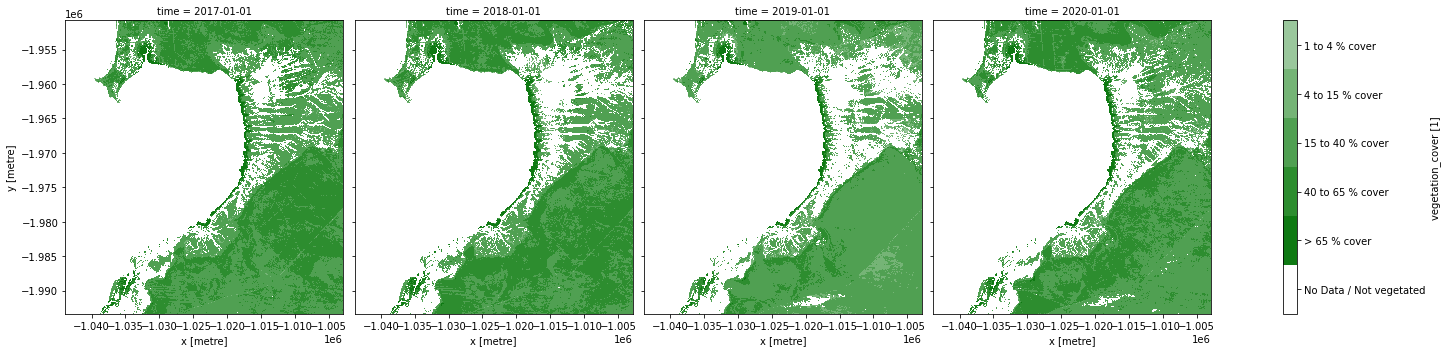

In [23]:
plot_land_cover(lc.vegetation_cover)

#### Water seasonality

Water seasonality describes length of time an aquatic vegetated area was measured as being inundated.
It is categorised as follows: 

* 0: No data or not an aquatic environment 
* 1: Semi-permanent or permanent (> 3 months)  
* 2: Temporary or seasonal (< 3 months)  

Water seasonality provides detail to the natural aquatic vegetation class (124).


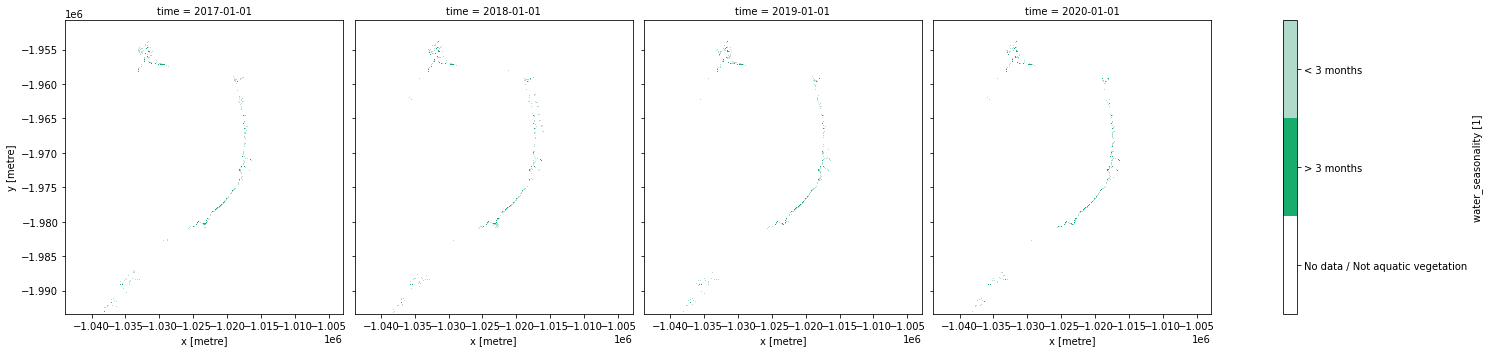

In [24]:
plot_land_cover(lc.water_seasonality)

As water seasonlity only relates to wet vegetation, it's hard to see the seasonality changes at this scale. 
We can easily 'zoom in' a little to see more detail. 

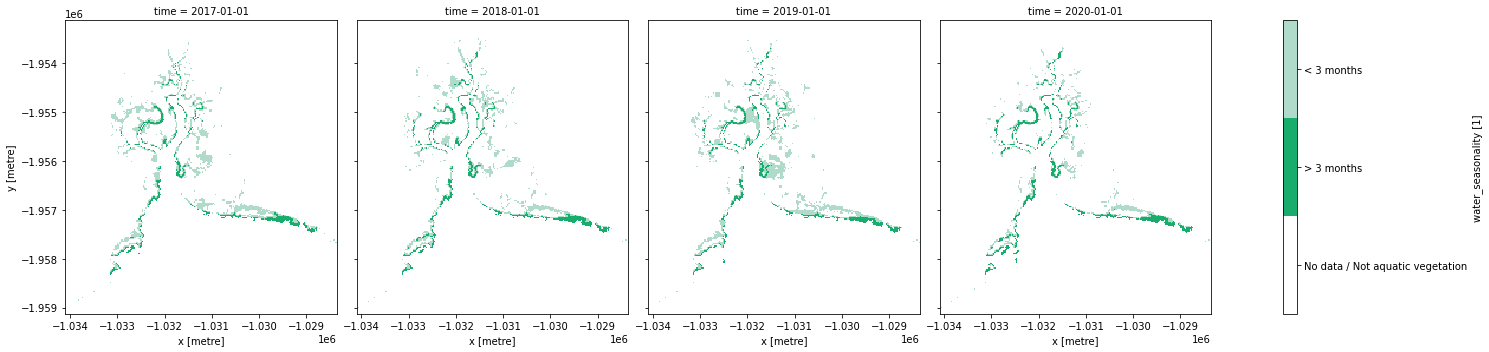

In [25]:
plot_land_cover(lc.water_seasonality[:,1370:1610,1020:1250])

#### Water state

The water state class descriptor provides detail to the aquatic base class.
It is categorised as 

Water state describes whether the detected water is snow, ice or liquid water. 

> **Note:** Only liquid water is described in this release.

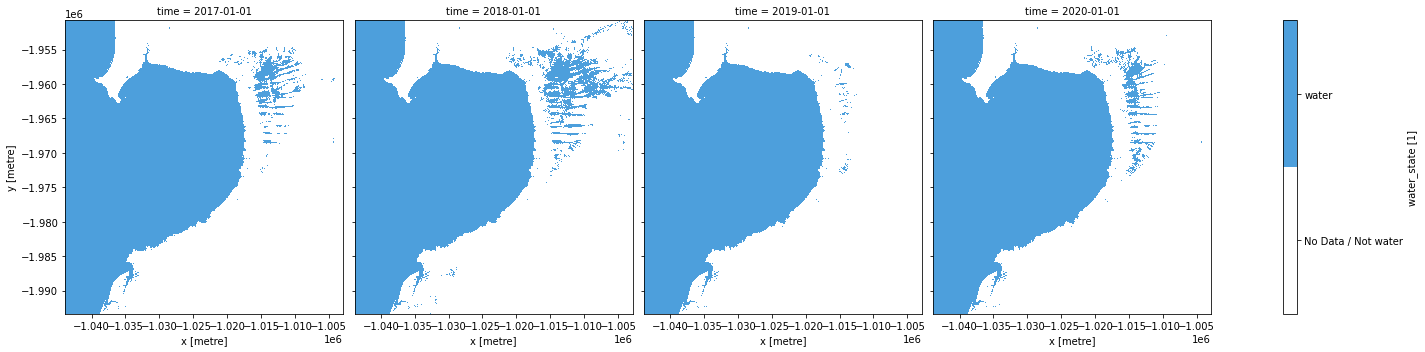

In [26]:
plot_land_cover(lc.water_state)

#### Intertidal 

The intertidal class descriptor provides detail to the aquatic base class.

The intertidal class descriptor delineates the intertidal zone.

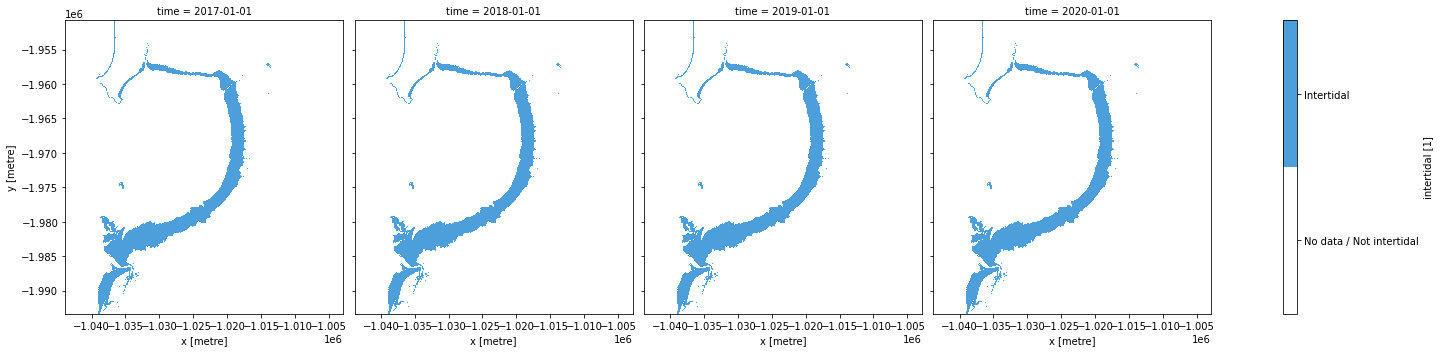

In [27]:
plot_land_cover(lc.intertidal)

#### Water persistence 

The water persistence class descriptor provides detail to the aquatic base class.

Water persistence describes the number of months a water body contains water.

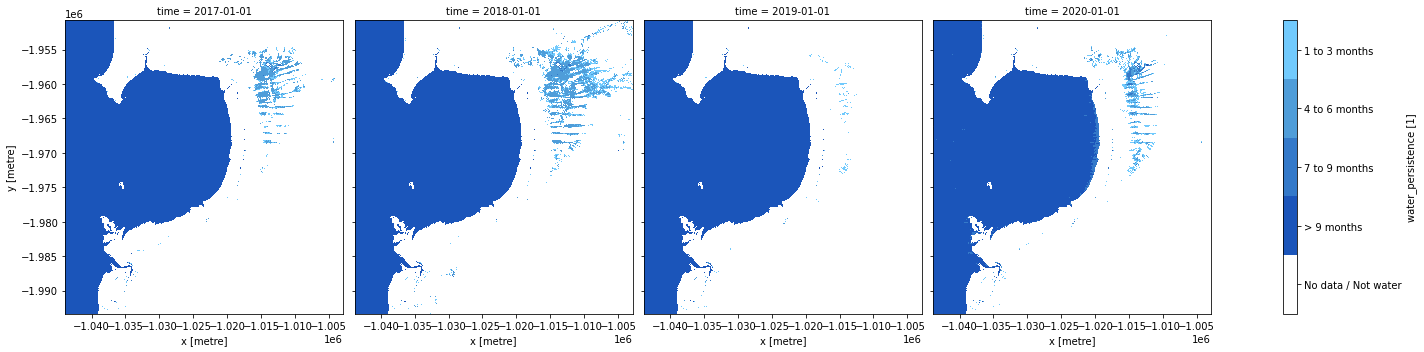

In [28]:
plot_land_cover(lc.water_persistence)

#### Bare gradation

The bare gradation class descriptor provides detail to the natural bare base class. 

Bare gradation describes the percentage of bare cover in naturally bare areas.

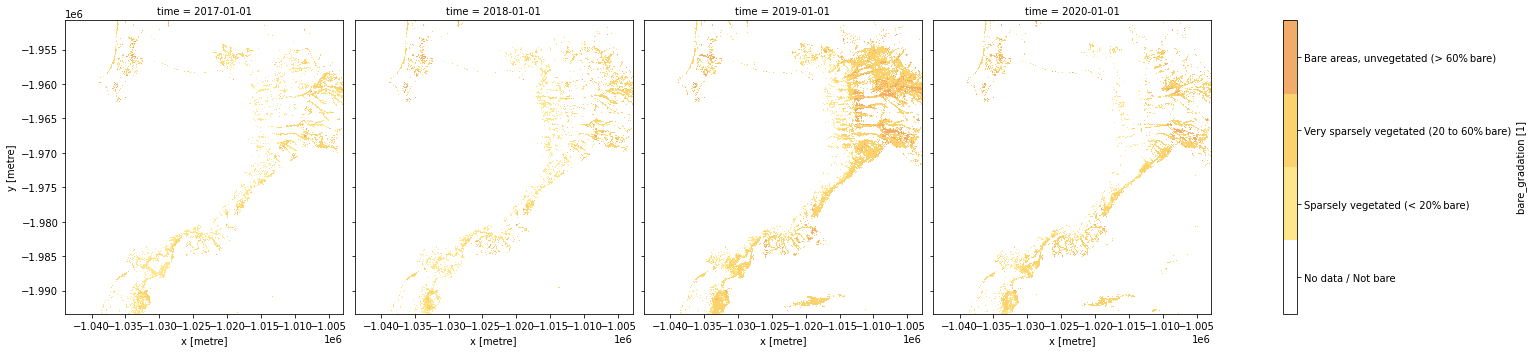

In [29]:
plot_land_cover(lc.bare_gradation)

### Level 4 visualisation

The Level 4 classification combines the Level 3 base classes with the 7 class descriptors. 

The next 2 cells define a colour scheme for the `level4` classification, then use the `plot_layer()` function to visualise the data. 

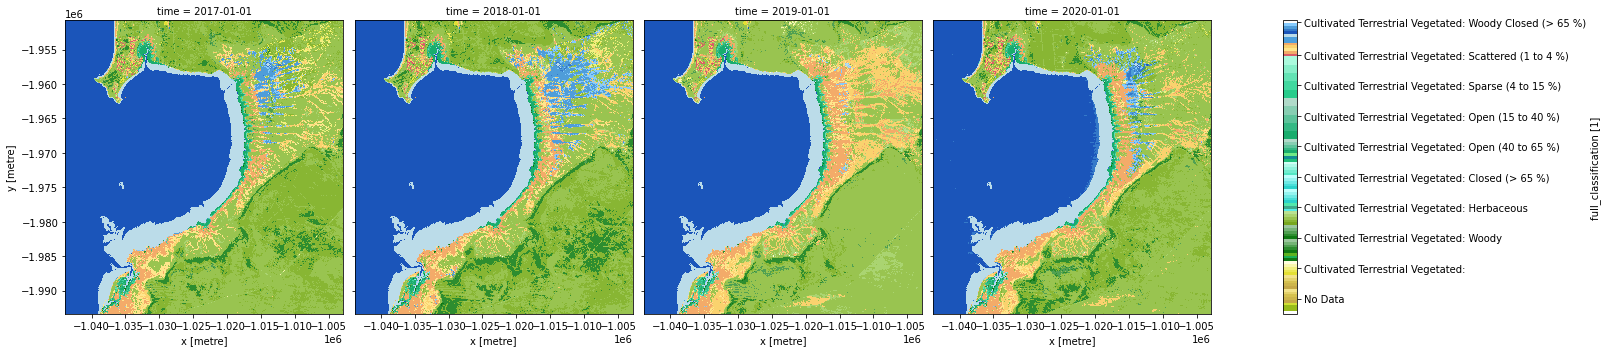

In [30]:
plot_land_cover(lc.full_classification)

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** January 2021

**Compatible datacube version:** 

In [21]:
print(datacube.__version__)

1.8.6


## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)